In [1]:
# imports
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# my project in Google Cloud used
PROJECT = "ba820-avs"

# some settings for pandas
pd.options.display.max_rows=125
pd.options.display.max_columns=100


In [2]:
# auth against your BU GCP account 
#from google.colab import auth
#auth.authenticate_user()
#print('Authenticated')

In [3]:
# get the data from Big Query
# select all the records  
SQL = """
SELECT *
FROM `questrom.datasets.crm_campaign`
"""

crm = pd.io.gbq.read_gbq(SQL, PROJECT)

In [4]:
# what do we have
crm.shape

(71580, 3)

In [5]:
crm.head()

,crm_id,contcode,contcat
0,1559056674,None,None
1,2827154834,None,None
2,551329474,None,None
3,891404074,None,None
4,3078814423,None,None


In [6]:
#### Exercise 1

In [7]:
# first, I am going to use granular codes, not the category
# so drop contcat
crm.drop(columns="contcat", inplace=True)


In [8]:
# second, drop dupes if any
crm.drop_duplicates(inplace=True)

In [9]:
# last confirm we have missing data
crm.isna().sum()

crm_id       0
contcode    19
dtype: int64

In [10]:
# we will remove these records
# even robust client data warehouses will have dirty data!
crm.dropna(inplace=True)

crm.isna().sum()

crm_id      0
contcode    0
dtype: int64

In [11]:
# ok, reshape
crm['flag'] = True

db = crm.pivot(index="crm_id", columns="contcode", values="flag")
db.fillna(False, inplace=True)

db.shape

(51157, 108)

In [12]:
#### Exercise 2

In [13]:
# a quick glimpse
db.head(3)

contcode,ABR,ACT,APN,ATH,BAE,BBA,BCL,BOT,BSE,BXE,CAI,CBC,CHS,CMO,CSP,CWL,CWP,DEC,FER,FNA,FNE,HOB,IAR,IAS,ICR,IID,ILT,IME,IPF,ISA,ITI,IUR,LET,LLA,LLC,LLN,LNE,LOA,LOC,LON,LOS,LOT,LTC,MLB,NRC,OFR,OHA,OPP,OPR,PCC,...,ROA,ROC,RON,S5B,SAE,SLC,SLN,SLS,SOA,SOC,SON,SPE,SPN,SSE,TIS,TOE,TSA,VCA,VET,VEU,VGR,VHS,VHV,VIS,VJU,VMA,VMC,VRT,VSA,VSI,VTR,W00,WCG,WCP,WI1,WIF,WIT,WNR,WSP,WSR,WTT,WWF,WWI,WWL,WWM,WWP,WWR,WWT,WZF,WZT
crm_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
39399,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65193,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
67182,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# lets review how many "converted" via the CMO marketing code
converted = db.CMO.sum() 
print(converted)
db.CMO.mean()

7351


0.14369490001368337

In [15]:
#2 ten most frequent interactions
interactions = db.sum(axis=0)
interactions.sort_values(ascending=False)[:10]

contcode
CMO    7351
SPN    5215
SPE    5147
IPF    3972
LON    3451
LOS    3362
TSA    2792
VSI    2274
WTT    2256
APN    2219
dtype: int64

In [16]:
#3 avg number of transcations
user_ints = db.sum(axis=1)
user_ints.mean() 

1.378677404851731

/Users/alexandervonschwerdtner/opt/miniconda3/envs/ba820/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

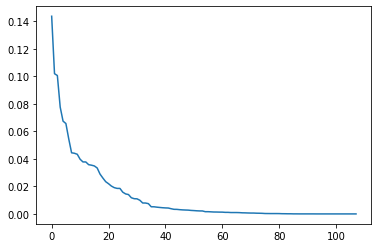

In [17]:
#4 item frequency
interactions_f = interactions / len(db)

interactions_f.sort_values(ascending=False, inplace=True)

sns.lineplot(range(len(interactions_f)), interactions_f.values)

In [18]:
#### Exercise 3

In [19]:
itemsets = apriori(db, min_support=.0002, use_colnames=True)

rules = association_rules(itemsets, metric="support", min_threshold=.0002)

In [20]:
#### Exercise 4

In [21]:
# a quick review across the outputs
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,26900.000000,26900.000000,26900.000000,26900.000000,26900.000000,26900.000000,2.690000e+04
mean,0.016780,0.016780,0.000570,0.188367,26.334011,0.000471,inf
std,0.029662,0.029662,0.000976,0.241681,53.983974,0.000863,NaN
min,0.000215,0.000215,0.000215,0.001496,0.065860,-0.011619,8.644864e-01
25%,0.001603,0.001603,0.000254,0.023154,7.106340,0.000225,1.020049e+00
50%,0.004594,0.004594,0.000332,0.090707,12.958382,0.000297,1.089841e+00
75%,0.018179,0.018179,0.000547,0.250000,26.934187,0.000493,1.307496e+00
max,0.143695,0.143695,0.043943,1.000000,1339.826190,0.036101,inf


In [22]:
# sample 10 rules
rules.sample(10).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20429,"(WWF, VSI, WI1, TSA)",(CMO),0.000704,0.143695,0.000665,0.944444,6.572568,0.000564,15.413492
6557,"(ACT, VSI)","(WWF, TSA)",0.005102,0.004985,0.000411,0.080460,16.141492,0.000385,1.082079
5397,"(OPP, WI1)","(CMO, ACT)",0.003108,0.014680,0.000528,0.169811,11.567294,0.000482,1.186862
6130,"(OFR, OPP, ACT)",(WI1),0.002072,0.015814,0.000528,0.254717,16.106992,0.000495,1.320553
20629,"(CMO, WCP)","(WTT, WZF, TSA)",0.007233,0.000977,0.000215,0.029730,30.417676,0.000208,1.029633


In [23]:
# top 10 lift
rules.sort_values("lift", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20673,"(WSR, WI1, TSA)","(CMO, WSP)",0.000274,0.000586,0.000215,0.785714,1339.826190,0.000215,4.663930
20688,"(CMO, WSP)","(WSR, WI1, TSA)",0.000586,0.000274,0.000215,0.366667,1339.826190,0.000215,1.578515
20675,"(CMO, WSR, WI1)","(WSP, TSA)",0.000567,0.000313,0.000215,0.379310,1212.773707,0.000215,1.610607
20686,"(WSP, TSA)","(CMO, WSR, WI1)",0.000313,0.000567,0.000215,0.687500,1212.773707,0.000215,3.198186
11650,"(CMO, WSP)","(WSR, WI1)",0.000586,0.000645,0.000430,0.733333,1136.822222,0.000430,3.747581
20677,"(CMO, WSP, TSA)","(WSR, WI1)",0.000293,0.000645,0.000215,0.733333,1136.822222,0.000215,3.747581
20684,"(WSR, WI1)","(CMO, WSP, TSA)",0.000645,0.000293,0.000215,0.333333,1136.822222,0.000215,1.499560
11655,"(WSR, WI1)","(CMO, WSP)",0.000645,0.000586,0.000430,0.666667,1136.822222,0.000430,2.998241
20679,"(WSP, WI1, TSA)","(CMO, WSR)",0.000215,0.000938,0.000215,1.000000,1065.770833,0.000215,inf
10605,"(WSR, TSA)","(CMO, WSP)",0.000469,0.000586,0.000293,0.625000,1065.770833,0.000293,2.665103


In [24]:
# top 10 on count
# we can work backwards
rules['count'] = rules.support * len(db)

rules.sort_values('count', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count
224,(CMO),(TSA),0.143695,0.054577,0.043943,0.305809,5.603244,0.036101,1.361906,2248.0
225,(TSA),(CMO),0.054577,0.143695,0.043943,0.805158,5.603244,0.036101,4.394860,2248.0
240,(CMO),(VSI),0.143695,0.044451,0.029732,0.206911,4.654761,0.023345,1.204844,1521.0
241,(VSI),(CMO),0.044451,0.143695,0.029732,0.668865,4.654761,0.023345,2.585973,1521.0
254,(CMO),(WTT),0.143695,0.044100,0.022793,0.158618,3.596815,0.016456,1.136107,1166.0
255,(WTT),(CMO),0.044100,0.143695,0.022793,0.516844,3.596815,0.016456,1.772316,1166.0
698,(WTT),(VSI),0.044100,0.044451,0.021346,0.484043,10.889255,0.019386,1.851991,1092.0
699,(VSI),(WTT),0.044451,0.044100,0.021346,0.480211,10.889255,0.019386,1.839017,1092.0
233,(VHS),(CMO),0.034893,0.143695,0.018179,0.521008,3.625796,0.013165,1.787725,930.0
232,(CMO),(VHS),0.143695,0.034893,0.018179,0.126513,3.625796,0.013165,1.104891,930.0


In [25]:
# keep just those with 6 on the LHS
# rules that always hold have infinite conviction 
# https://michael.hahsler.net/research/association_rules/measures.html#conviction
rules['lhs_len'] = rules.antecedents.apply(lambda x: len(x))

rules.loc[rules.lhs_len == 6, :].shape

(28, 11)

In [26]:
rules.loc[rules.lhs_len == 6, :].sample(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count,lhs_len
26649,"(WTT, TSA, CMO, WI1, VSI, OFR)",(OPP),0.000313,0.014543,0.000254,0.812500,55.867019,0.000250,5.255768,13.0,6
26522,"(WTT, TSA, CMO, VSI, VHS, OPP)",(OFR),0.000254,0.019118,0.000254,1.000000,52.307771,0.000249,inf,13.0,6
26648,"(WTT, TSA, CMO, WI1, VSI, OPP)",(OFR),0.000254,0.019118,0.000254,1.000000,52.307771,0.000249,inf,13.0,6
26779,"(WTT, WI1, VSI, OPP, VHS, OFR)",(CMO),0.000391,0.143695,0.000391,1.000000,6.959189,0.000335,inf,20.0,6
26400,"(TSA, CMO, VSI, VHS, OPP, OFR)",(WI1),0.000547,0.015814,0.000332,0.607143,38.392592,0.000324,2.505201,17.0,6


In [27]:
#### Exercise 5

In [28]:
# make a copy
strategy = rules.copy()

# calc rhs length
strategy['rhs_len'] = strategy.consequents.apply(lambda x: len(x))

In [29]:
# keep just the rules with the sales conversion on the right
ROWS = np.where((strategy.consequents=={'CMO'}) & (strategy.rhs_len == 1))

strategy = strategy.iloc[ROWS[0], :]

In [30]:
# confirm this is what we intended
strategy.shape

strategy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count,lhs_len,rhs_len
9,(ACT),(CMO),0.018570,0.143695,0.014680,0.790526,5.501422,0.012012,4.087889,751.0,1,1
67,(APN),(CMO),0.043376,0.143695,0.000411,0.009464,0.065860,-0.005822,0.864486,21.0,1,1
77,(ATH),(CMO),0.005200,0.143695,0.001662,0.319549,2.223801,0.000914,1.258437,85.0,1,1
99,(BOT),(CMO),0.001153,0.143695,0.000880,0.762712,5.307856,0.000714,3.608714,45.0,1,1
109,(CAI),(CMO),0.033407,0.143695,0.015501,0.464014,3.229162,0.010701,1.597626,793.0,1,1


In [31]:
# explore -- long sales pipelines == many interactions on the LHS

strategy.sort_values('lhs_len', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count,lhs_len,rhs_len
26779,"(WTT, WI1, VSI, OPP, VHS, OFR)",(CMO),0.000391,0.143695,0.000391,1.000000,6.959189,0.000335,inf,20.0,6,1
26652,"(WTT, TSA, WI1, VSI, OPP, OFR)",(CMO),0.000254,0.143695,0.000254,1.000000,6.959189,0.000218,inf,13.0,6,1
26526,"(WTT, TSA, VSI, OPP, VHS, OFR)",(CMO),0.000254,0.143695,0.000254,1.000000,6.959189,0.000218,inf,13.0,6,1
26401,"(TSA, WI1, VSI, VHS, OPP, OFR)",(CMO),0.000332,0.143695,0.000332,1.000000,6.959189,0.000285,inf,17.0,6,1
23982,"(TSA, WWF, VSI, OPP, OFR)",(CMO),0.000332,0.143695,0.000332,1.000000,6.959189,0.000285,inf,17.0,5,1
23672,"(TSA, WI1, VHS, OPP, OFR)",(CMO),0.000547,0.143695,0.000547,1.000000,6.959189,0.000469,inf,28.0,5,1
23733,"(WTT, TSA, OPP, VHS, OFR)",(CMO),0.000371,0.143695,0.000371,1.000000,6.959189,0.000318,inf,19.0,5,1
23796,"(TSA, WWF, OPP, VHS, OFR)",(CMO),0.000293,0.143695,0.000293,1.000000,6.959189,0.000251,inf,15.0,5,1
23858,"(TSA, WI1, VSI, OPP, OFR)",(CMO),0.000704,0.143695,0.000704,1.000000,6.959189,0.000603,inf,36.0,5,1
23919,"(WTT, TSA, VSI, OPP, OFR)",(CMO),0.000606,0.143695,0.000567,0.935484,6.510209,0.000480,13.272729,29.0,5,1


<AxesSubplot:xlabel='support', ylabel='confidence'>

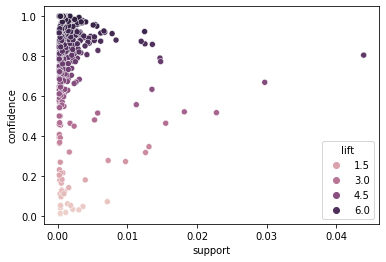

In [32]:
# some plots

sns.scatterplot(data=strategy, x="support", y="confidence", hue="lift")

<AxesSubplot:xlabel='lhs_len', ylabel='confidence'>

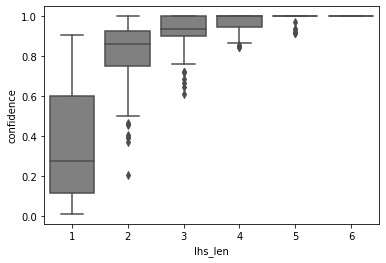

In [33]:
# number of lhs items balanced against support
sns.boxplot(data=strategy, x="lhs_len", y="confidence", color="grey")

## what does this suggest about a customers interactions WHEN, we know that they converted?

In [34]:
# fastest path
rule1 = strategy.loc[strategy.lhs_len == 1, :]
rule1.sort_values("lift", ascending=False, inplace=True)

rule1.head(10)

/Users/alexandervonschwerdtner/opt/miniconda3/envs/ba820/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,count,lhs_len,rhs_len
249,(WIT),(CMO),0.002561,0.143695,0.002326,0.908397,6.321706,0.001958,9.347997,119.0,1,1
205,(OPP),(CMO),0.014543,0.143695,0.012530,0.861559,5.995753,0.010440,6.185349,641.0,1,1
247,(WI1),(CMO),0.015814,0.143695,0.013586,0.859085,5.978537,0.011313,6.076762,695.0,1,1
189,(ILT),(CMO),0.000254,0.143695,0.000215,0.846154,5.888545,0.000179,5.565983,11.0,1,1
225,(TSA),(CMO),0.054577,0.143695,0.043943,0.805158,5.603244,0.036101,4.394860,2248.0,1,1
9,(ACT),(CMO),0.018570,0.143695,0.014680,0.790526,5.501422,0.012012,4.087889,751.0,1,1
201,(OFR),(CMO),0.019118,0.143695,0.014778,0.773006,5.379496,0.012031,3.772371,756.0,1,1
99,(BOT),(CMO),0.001153,0.143695,0.000880,0.762712,5.307856,0.000714,3.608714,45.0,1,1
251,(WSP),(CMO),0.000821,0.143695,0.000586,0.714286,4.970849,0.000468,2.997068,30.0,1,1
235,(VIS),(CMO),0.002776,0.143695,0.001955,0.704225,4.900837,0.001556,2.895127,100.0,1,1


In [35]:
# above, you might recommend flagging those that only have TSA interaction
# or to provide options, by say, filtering on sample size > 500?